## Assig_05

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data = data[['Gender','Age','EstimatedSalary','Purchased']]

In [5]:
print(data.head())

   Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0


In [6]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

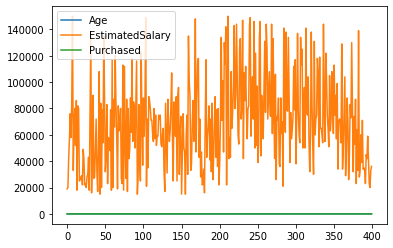

In [7]:
data.plot()

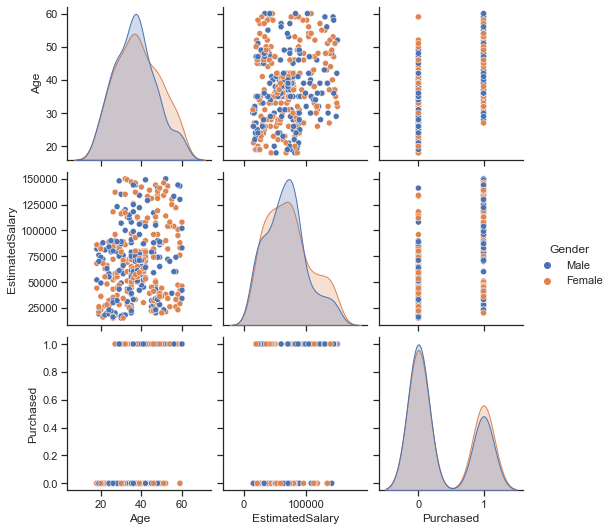

In [8]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(data, hue="Gender")

<AxesSubplot:xlabel='Purchased', ylabel='count'>

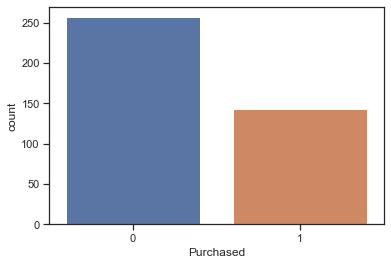

In [9]:
sns.countplot(x="Purchased",data=data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

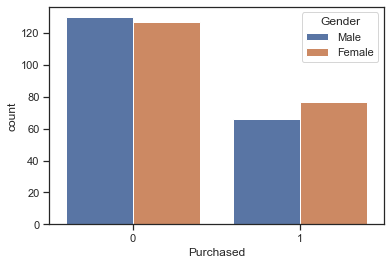

In [10]:
sns.countplot(x="Purchased",hue="Gender",data=data)

In [11]:
pd.get_dummies(data['Gender'])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [12]:
sex = pd.get_dummies(data['Gender'],drop_first=True)
sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [13]:
data_p = pd.concat([data,sex],axis=1)

In [14]:
data_p.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [15]:
data_p = data_p.drop(['Gender'],axis=1)

In [16]:
data_p.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


## Now Lets Split The Data

In [17]:
X = data_p[['Age','EstimatedSalary','Male']].values
y = data_p['Purchased'].values

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [19]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log = LogisticRegression()
log.fit(X_train,y_train)
predict = log.predict(X_test)

## Now Lets See The Accuracy Of our model

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predict))

[[74  5]
 [ 8 33]]


In [23]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



In [24]:
tn, fp, fn, tp = confusion_matrix(y_test,predict).ravel()
print(tn, fp, fn, tp)

74 5 8 33


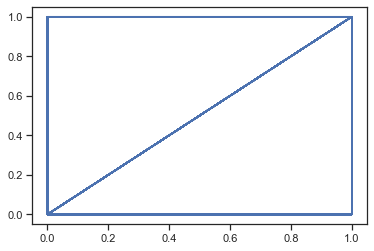

In [25]:
plt.plot(y_test,predict)
plt.show()